In [1]:
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
import torch.optim as optim
from script.tools import tools
from script.collection import Parameter as pmt
import sys
print(sys.executable)
import net
import os
from script.tools import collection
#result = collection.collection("collection/workspace1")  #[iops,dic_ssd,dic_worload,f.path]
#result = collection.collection("collection/workspace2",result)
result = collection.collection("collection/workspace_ssd0_workload0")
result = result[:1000]
plst = collection.getParameters(path="collection/config.xlsx",id = "0")
expect = ['Seed','key','default']
def test(x_,y_,m, mean = 0,std = 1):
    x_ = (x_ - mean)/std
    y_pre = m(x_)
    y_e = abs(y_pre - y_)/y_
    print(torch.sum(y_e)/len(y_))

/opt/homebrew/anaconda3/bin/python
no scenario collection/workspace_ssd0_workload0/1854/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/425/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/866/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/1994/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/1702/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/428/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/3472/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/1796/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/2148/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/2918/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/3981/workload_scenario_1.xml
no scenario collection/workspace_ssd0_workload0/2456/workload_scenario_1.xml
no scenario collection/workspace_ssd0_worklo

/opt/homebrew/anaconda3/lib/python3.9/site-packages/openpyxl/reader/excel.py:237: UserWarning: Data Validation extension is not supported and will be removed
  ws_parser.bind_all()


In [9]:
#print(result[0])

In [2]:
#print(result[0])
from script.tools import collection
split_index = int(len(result)*0.7)
train_result = result[:split_index]
test_result  = result[split_index:]
x_train_lst, y_train_lst, keys = collection.result2lst(train_result,plst,expect)
x_test_lst,  y_test_lst, keys = collection.result2lst(test_result,plst,expect)
x_train_tensor = torch.tensor(  x_train_lst  ,dtype=torch.float)
y_train_tensor = torch.tensor( y_train_lst   ,dtype=torch.float)/10000
x_test_tensor = torch.tensor( x_test_lst   ,dtype=torch.float)
y_test_tensor = torch.tensor( y_test_lst   ,dtype=torch.float)/10000
x_mean = x_train_tensor.mean(dim = 0)
x_std = x_train_tensor.std(dim = 0)
x_train_tensor_nor = (x_train_tensor -x_mean)/x_std

dataset = collection.CustomDataset(x_train_tensor_nor, y_train_tensor)
batch_size = 5
dataloader = collection.DataLoader(dataset, batch_size=batch_size, shuffle=True)
model = net.DeepNet(19,8,1,5)
criterion = nn.MSELoss()
print(len(keys))

19


In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# 创建随机森林分类器模型
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 拟合模型
rf.fit(x_train_lst, y_train_lst)

# 进行预测
y_pred = rf.predict(x_test_lst)

# 计算准确率
accuracy = accuracy_score(y_test_lst, y_pred)
print("Accuracy:", accuracy)

/var/folders/rd/h7txkcl151v0t98vbxrrxz8m0000gn/T/ipykernel_14669/1473277975.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train_lst, y_train_lst)


ValueError: Unknown label type: 'continuous'

In [4]:
print(x_train_lst[0])

[0.18117320885449656, 8, 2362, 2, 609130, 166474, 4022368, 6786404, 1, 6, 7168, 1536, 3, 2, 1, 6, 73, 22, 41]


In [5]:
print(keys)

['Overprovisioning_Ratio', 'Flash_Channel_Count', 'Channel_Transfer_Rate', 'Chip_No_Per_Channel', 'Page_Read_Latency_LSB', 'Page_Read_Latency_MSB', 'Page_Program_Latency_LSB', 'Page_Program_Latency_MSB', 'Die_No_Per_Chip', 'Plane_No_Per_Die', 'Block_No_Per_Plane', 'Page_No_Per_Block', 'Channel_IDs', 'Chip_IDs', 'Die_IDs', 'Plane_IDs', 'Initial_Occupancy_Percentage', 'Working_Set_Percentage', 'Read_Percentage']


举个例子 $e^{sinx}$


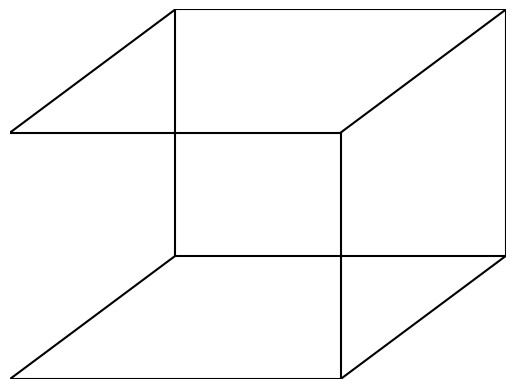

In [21]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
def draw(x0,y0,z0):

    lines=[
        [[0,x0],[0,y0],[0,z0]],
        []
    ]
        for line in lines:
        ax.plot(*zip(*line), color='black')

    # 设置坐标轴范围
    ax.set_xlim([0, 3])
    ax.set_ylim([0, 3])

    # 隐藏坐标轴
    ax.axis('off')

    plt.show()